In [1]:
from models.TorchClassifier import TorchClassifier
from Embeddings import Embeddings
import time
import utils
from sklearn.model_selection import train_test_split
import torch
from pprint import pprint
from models.FFNN import FFNN

In [2]:
# Create the embeddings object
embeddings = Embeddings('data/doc2vec.npy', 'data/bert.npy', 'data/authors.npy', 'data/authors_encoded.npy', 'pickles/author_encoder.pkl')

In [3]:
def run_ffnn(X, y, figure_title, scale_features=True):
    if scale_features:
        X = torch.from_numpy(utils.scale_feature_matrix(X)).float()
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test, train_index, test_index = train_test_split(X, y, range(len(y)), test_size=0.2, random_state=42)
    
    train_index = torch.tensor(train_index)
    test_index = torch.tensor(test_index)

    X_train, y_train = utils.over_sample(X_train, y_train)
    X_train, y_train = torch.from_numpy(X_train), torch.from_numpy(y_train)

    clf = TorchClassifier(FFNN, input_dim=768, hidden_dim=128, output_dim=20)
    # Find the best hyperparameters
    start = time.time()
    clf.train(X_train, y_train, epochs=30, lr=0.0001)
    print('Training time: ', time.time() - start)
    
    # Evaluate the model
    pprint(clf.evaluate(X_test, y_test))
    
    # Get the confusion matrix
    clf.get_confusion_matrix(X_test, y_test, figure_title, test_index)

In [4]:
# Load the feature matrix and labels
X = embeddings.get_doc2vec(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)

Epoch 1/30, Loss: 2.048734664916992
Epoch 2/30, Loss: 2.0816762447357178
Epoch 3/30, Loss: 1.9032953977584839
Epoch 4/30, Loss: 1.7872642278671265
Epoch 5/30, Loss: 1.9625518321990967
Epoch 6/30, Loss: 1.1562420129776
Epoch 7/30, Loss: 1.6142749786376953
Epoch 8/30, Loss: 0.9725330471992493
Epoch 9/30, Loss: 1.4773778915405273
Epoch 10/30, Loss: 1.6421949863433838
Epoch 11/30, Loss: 1.1851146221160889
Epoch 12/30, Loss: 1.9169018268585205
Epoch 13/30, Loss: 0.8683813214302063
Epoch 14/30, Loss: 1.8265382051467896
Epoch 15/30, Loss: 0.7305622696876526
Epoch 16/30, Loss: 1.2127145528793335
Epoch 17/30, Loss: 0.9561029672622681
Epoch 18/30, Loss: 0.822417140007019
Epoch 19/30, Loss: 2.529311180114746
Epoch 20/30, Loss: 1.5030016899108887
Epoch 21/30, Loss: 1.8662927150726318
Epoch 22/30, Loss: 1.5050708055496216
Epoch 23/30, Loss: 0.7487995624542236
Epoch 24/30, Loss: 1.1989048719406128
Epoch 25/30, Loss: 1.7777400016784668
Epoch 26/30, Loss: 1.8601269721984863
Epoch 27/30, Loss: 0.799366

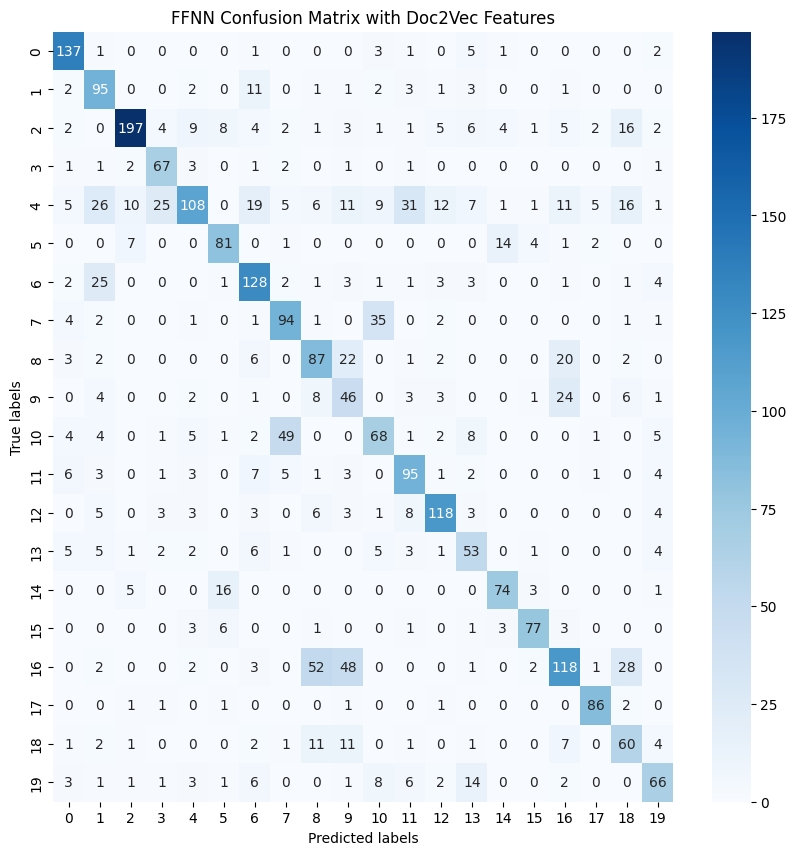

In [5]:
# Run the network with the Doc2Vec Features
run_ffnn(X, y, 'FFNN Confusion Matrix with Doc2Vec Features', scale_features=True)

In [6]:
# Load the BERT embeddings
X = embeddings.get_bert(as_torch=True).float()
y = embeddings.get_labels(as_torch=True)

Epoch 1/30, Loss: 1.99183988571167
Epoch 2/30, Loss: 1.297873854637146
Epoch 3/30, Loss: 1.1282157897949219
Epoch 4/30, Loss: 0.9195656776428223
Epoch 5/30, Loss: 1.0730005502700806
Epoch 6/30, Loss: 0.6408878564834595
Epoch 7/30, Loss: 0.5332524180412292
Epoch 8/30, Loss: 1.2567037343978882
Epoch 9/30, Loss: 1.352184534072876
Epoch 10/30, Loss: 0.241399884223938
Epoch 11/30, Loss: 0.6740295886993408
Epoch 12/30, Loss: 0.6210955381393433
Epoch 13/30, Loss: 1.1992489099502563
Epoch 14/30, Loss: 0.4081489145755768
Epoch 15/30, Loss: 0.6186321973800659
Epoch 16/30, Loss: 1.5019233226776123
Epoch 17/30, Loss: 0.4115659296512604
Epoch 18/30, Loss: 0.1304652988910675
Epoch 19/30, Loss: 1.0366899967193604
Epoch 20/30, Loss: 0.6660539507865906
Epoch 21/30, Loss: 1.4560606479644775
Epoch 22/30, Loss: 0.501140832901001
Epoch 23/30, Loss: 0.2319200038909912
Epoch 24/30, Loss: 0.49508136510849
Epoch 25/30, Loss: 0.4981505870819092
Epoch 26/30, Loss: 1.559950351715088
Epoch 27/30, Loss: 0.026270559

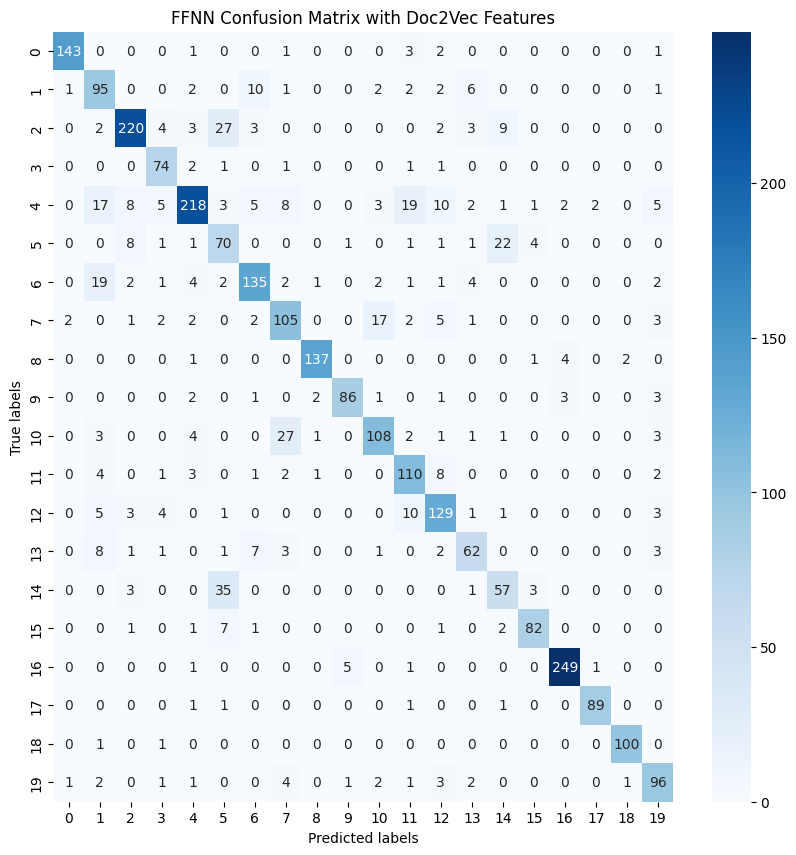

In [7]:
# Run the network with the BERT Features
run_ffnn(X, y, 'FFNN Confusion Matrix with Doc2Vec Features', scale_features=True)